In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)

In [97]:
!pip install kaggle

  Using cached kaggle-1.6.17.tar.gz (82 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
  Using cached bleach-6.1.0-py3-none-any.whl (162 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using legacy 'setup.py install' for kaggle, since package 'wheel' is not installed.
    Running setup.py install for kaggle: started
    Running setup.py install for kaggle: finished with status 'done'


You should consider upgrading via the 'C:\Users\pablo\Desktop\Tech Challenge 3\pneumonia\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [98]:
# Download do arquivo
import os
import json

# Definir o caminho do arquivo kaggle.json
kaggle_json_path = os.path.join(os.getcwd(), '.kaggle', 'kaggle.json')

# Verificar se o arquivo existe
if os.path.exists(kaggle_json_path):
    # Ler o arquivo kaggle.json
    with open(kaggle_json_path, 'r') as f:
        kaggle_creds = json.load(f)

    # Configurar as credenciais
    os.environ['KAGGLE_USERNAME'] = kaggle_creds['username']
    os.environ['KAGGLE_KEY'] = kaggle_creds['key']

    # Configurar a API do Kaggle
    from kaggle.api.kaggle_api_extended import KaggleApi
    api = KaggleApi()
    api.authenticate()

    # Baixar o dataset
    dataset = 'alexteboul/diabetes-health-indicators-dataset'
    api.dataset_download_files(dataset, path='datasets', unzip=True)
    print("Dataset baixado com sucesso.")
else:
    print(f"Arquivo {kaggle_json_path} não encontrado. Verifique o caminho e tente novamente.")


Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
Dataset baixado com sucesso.


In [55]:
# Lendo arquivo CSV
df = pd.read_csv('datasets/diabetes_binary_health_indicators_BRFSS2015.csv')

## Dataset

In [56]:
# Ver os primeiros dados
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [57]:
# Resumo estatístico das variáveis numéricas
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [59]:
# Verificar valores nulos
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [60]:
# Verificando duplicatas
df.duplicated().sum()

np.int64(24206)

In [61]:
df["Diabetes_binary"].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

## Data Clean

### Processando os Dados

In [62]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [63]:
# Convertendo a tipagem dos campos

df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

### Removendo duplicatas

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.shape

(229474, 22)

### Verificando Outliers

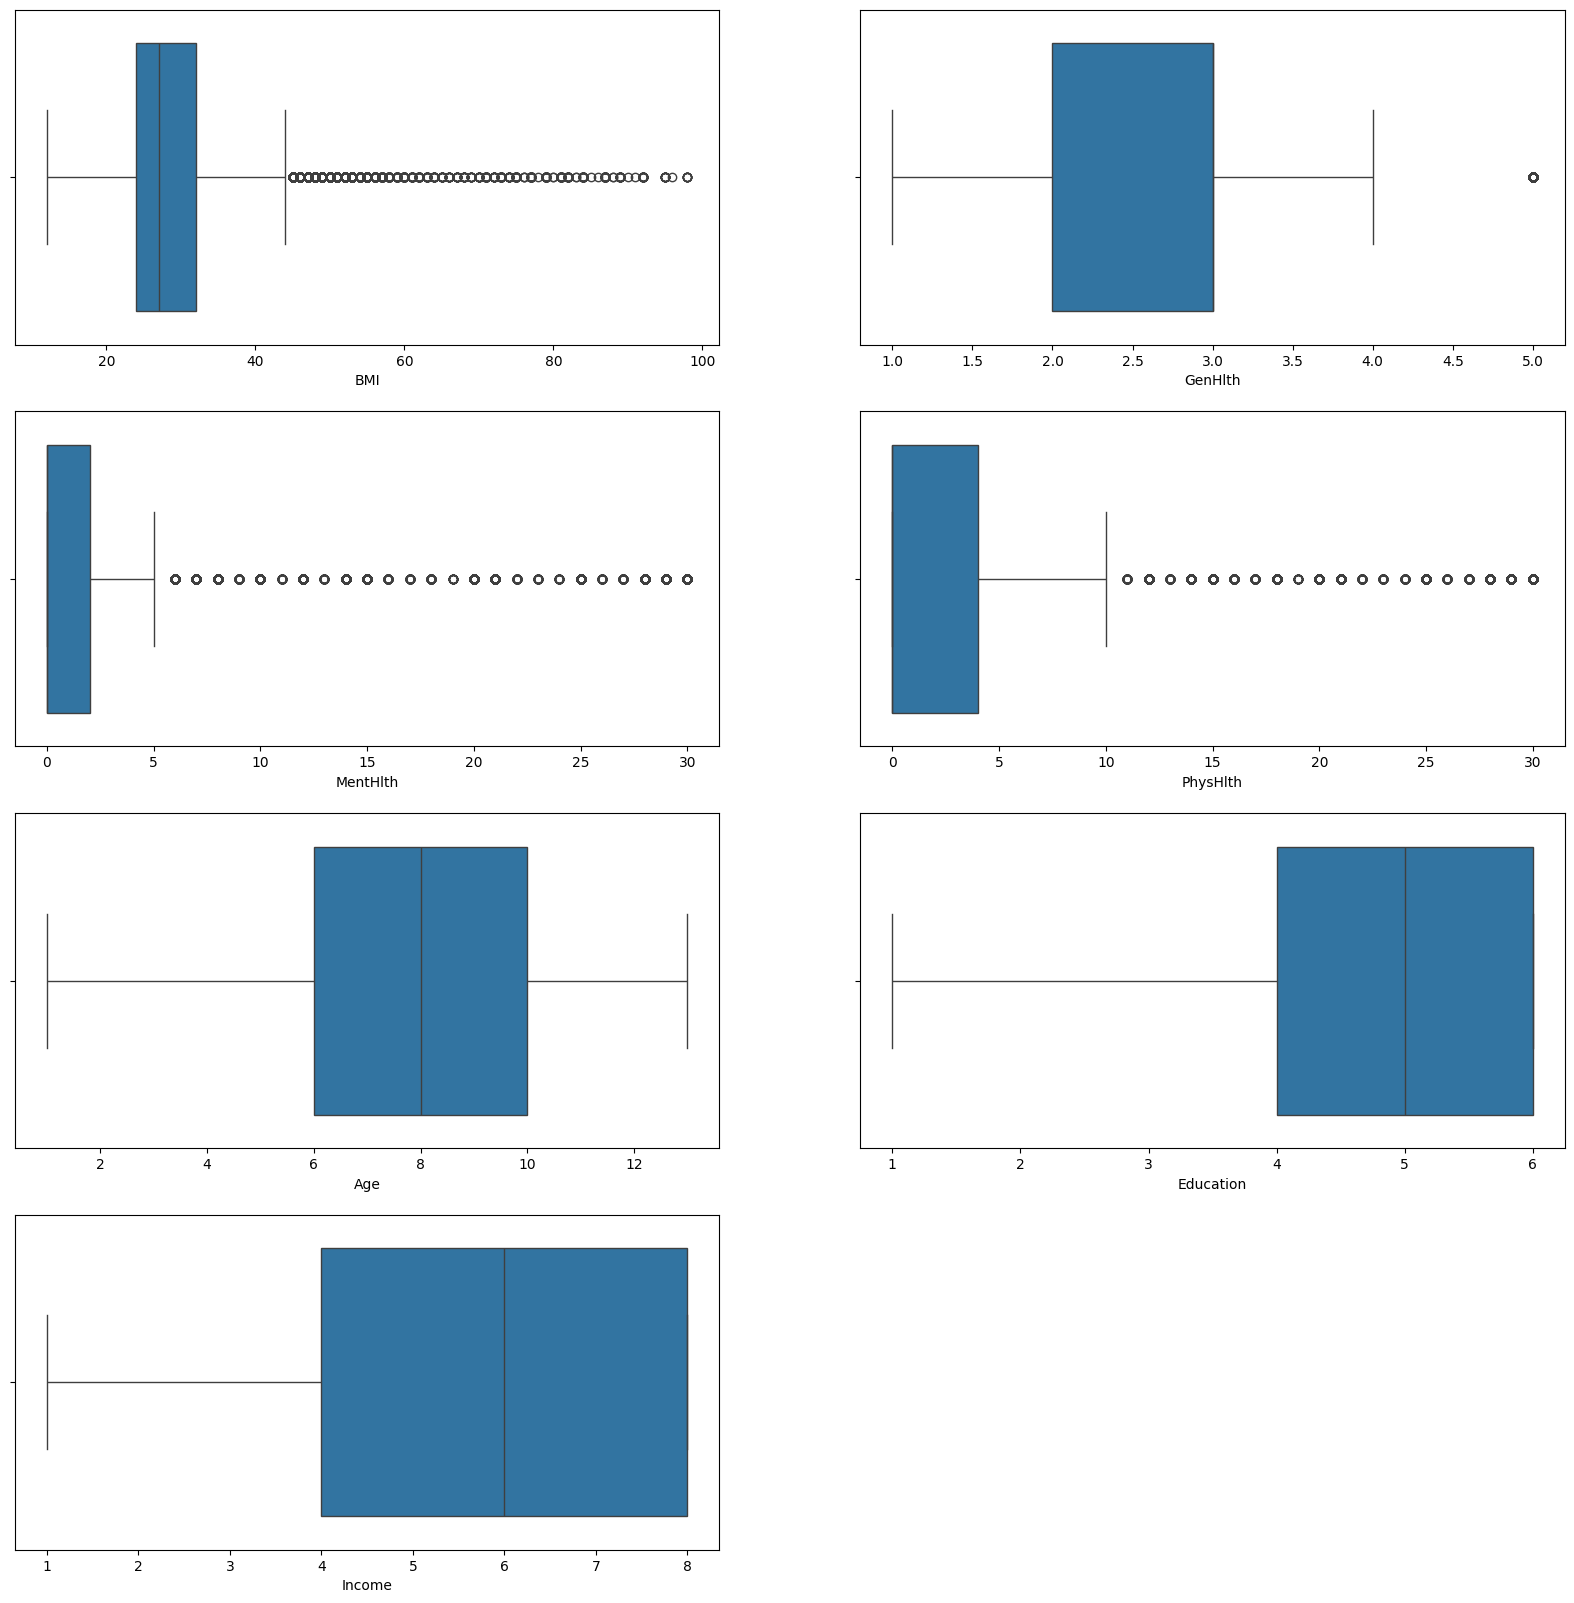

In [67]:
plt.figure(figsize = (20,20))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

Não Há Outliers

### Ajustando valores para a Análise Exploratória

In [79]:
df_eda = df.copy() 

In [80]:
df_eda.Age[df_eda['Age'] == 1] = '18 to 24'
df_eda.Age[df_eda['Age'] == 2] = '25 to 29'
df_eda.Age[df_eda['Age'] == 3] = '30 to 34'
df_eda.Age[df_eda['Age'] == 4] = '35 to 39'
df_eda.Age[df_eda['Age'] == 5] = '40 to 44'
df_eda.Age[df_eda['Age'] == 6] = '45 to 49'
df_eda.Age[df_eda['Age'] == 7] = '50 to 54'
df_eda.Age[df_eda['Age'] == 8] = '55 to 59'
df_eda.Age[df_eda['Age'] == 9] = '60 to 64'
df_eda.Age[df_eda['Age'] == 10] = '65 to 69'
df_eda.Age[df_eda['Age'] == 11] = '70 to 74'
df_eda.Age[df_eda['Age'] == 12] = '75 to 79'
df_eda.Age[df_eda['Age'] == 13] = '80 or older'

df_eda.Diabetes_binary[df_eda['Diabetes_binary'] == 0] = 'No Diabetes'
df_eda.Diabetes_binary[df_eda['Diabetes_binary'] == 1] = 'Diabetes'

df_eda.HighBP[df_eda['HighBP'] == 0] = 'No High'
df_eda.HighBP[df_eda['HighBP'] == 1] = 'High BP'

df_eda.HighChol[df_eda['HighChol'] == 0] = 'No High Cholesterol'
df_eda.HighChol[df_eda['HighChol'] == 1] = 'High Cholesterol'

df_eda.CholCheck[df_eda['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_eda.CholCheck[df_eda['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_eda.Smoker[df_eda['Smoker'] == 0] = 'No'
df_eda.Smoker[df_eda['Smoker'] == 1] = 'Yes'

df_eda.Stroke[df_eda['Stroke'] == 0] = 'No'
df_eda.Stroke[df_eda['Stroke'] == 1] = 'Yes'

df_eda.HeartDiseaseorAttack[df_eda['HeartDiseaseorAttack'] == 0] = 'No'
df_eda.HeartDiseaseorAttack[df_eda['HeartDiseaseorAttack'] == 1] = 'Yes'

df_eda.PhysActivity[df_eda['PhysActivity'] == 0] = 'No'
df_eda.PhysActivity[df_eda['PhysActivity'] == 1] = 'Yes'

df_eda.Fruits[df_eda['Fruits'] == 0] = 'No'
df_eda.Fruits[df_eda['Fruits'] == 1] = 'Yes'

df_eda.Veggies[df_eda['Veggies'] == 0] = 'No'
df_eda.Veggies[df_eda['Veggies'] == 1] = 'Yes'

df_eda.HvyAlcoholConsump[df_eda['HvyAlcoholConsump'] == 0] = 'No'
df_eda.HvyAlcoholConsump[df_eda['HvyAlcoholConsump'] == 1] = 'Yes'

df_eda.AnyHealthcare[df_eda['AnyHealthcare'] == 0] = 'No'
df_eda.AnyHealthcare[df_eda['AnyHealthcare'] == 1] = 'Yes'

df_eda.NoDocbcCost[df_eda['NoDocbcCost'] == 0] = 'No'
df_eda.NoDocbcCost[df_eda['NoDocbcCost'] == 1] = 'Yes'

df_eda.GenHlth[df_eda['GenHlth'] == 5] = 'Excellent'
df_eda.GenHlth[df_eda['GenHlth'] == 4] = 'Very Good'
df_eda.GenHlth[df_eda['GenHlth'] == 3] = 'Good'
df_eda.GenHlth[df_eda['GenHlth'] == 2] = 'Fair'
df_eda.GenHlth[df_eda['GenHlth'] == 1] = 'Poor'

df_eda.DiffWalk[df_eda['DiffWalk'] == 0] = 'No'
df_eda.DiffWalk[df_eda['DiffWalk'] == 1] = 'Yes'

df_eda.Sex[df_eda['Sex'] == 0] = 'Female'
df_eda.Sex[df_eda['Sex'] == 1] = 'Male'

df_eda.Education[df_eda['Education'] == 1] = 'Never Attended School'
df_eda.Education[df_eda['Education'] == 2] = 'Elementary'
df_eda.Education[df_eda['Education'] == 3] = 'Junior High School'
df_eda.Education[df_eda['Education'] == 4] = 'Senior High School'
df_eda.Education[df_eda['Education'] == 5] = 'Undergraduate Degree'
df_eda.Education[df_eda['Education'] == 6] = 'Magister'

df_eda.Income[df_eda['Income'] == 1] = 'Less Than $10,000'
df_eda.Income[df_eda['Income'] == 2] = 'Less Than $10,000'
df_eda.Income[df_eda['Income'] == 3] = 'Less Than $10,000'
df_eda.Income[df_eda['Income'] == 4] = 'Less Than $10,000'
df_eda.Income[df_eda['Income'] == 5] = 'Less Than $35,000'
df_eda.Income[df_eda['Income'] == 6] = 'Less Than $35,000'
df_eda.Income[df_eda['Income'] == 7] = 'Less Than $35,000'
df_eda.Income[df_eda['Income'] == 8] = '$75,000 or More'

C:\Users\pablo\AppData\Local\Temp\ipykernel_2844\156073341.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_eda.Age[df_eda['Age'] == 1] = '18 to 24'
C:\Users\pablo\AppData\Local\Temp\ipykernel_2844\156073341.py:1: FutureWarning: Settin

## Análise Exploratória

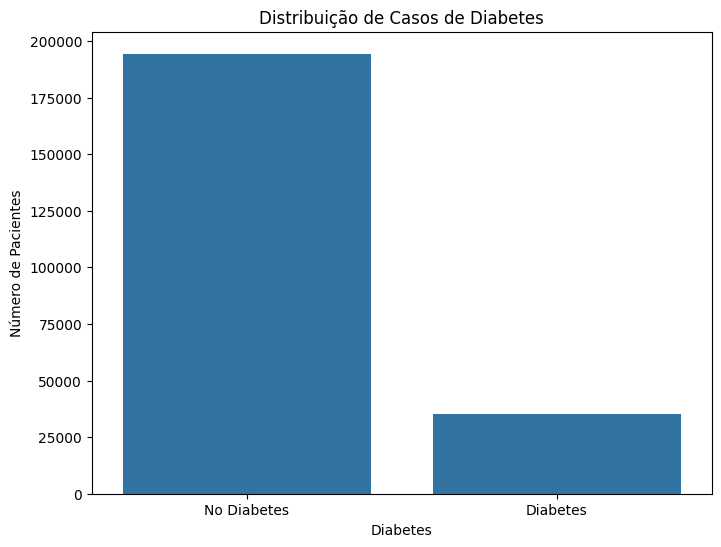

In [18]:
# Distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x='Diabetes_binary')
plt.title('Distribuição de Casos de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Número de Pacientes')
plt.show()

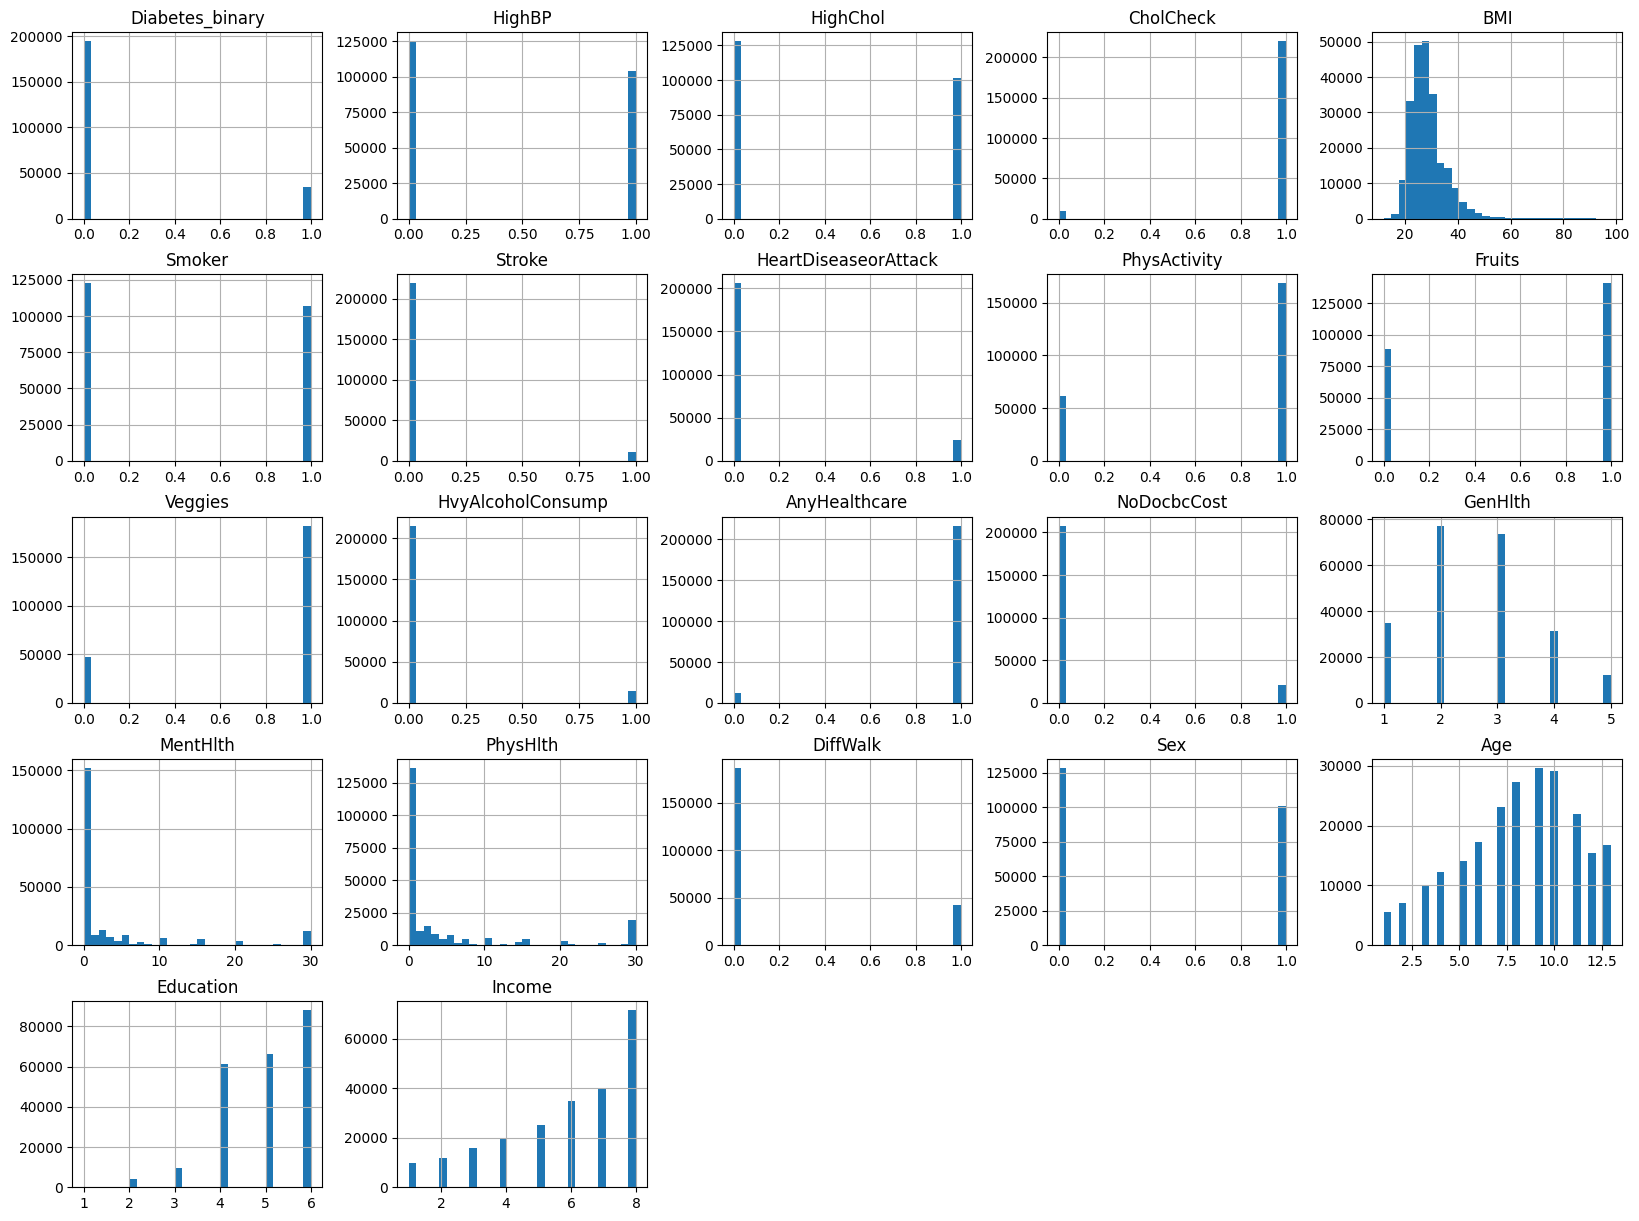

In [19]:
# Histograma de todas as colunas
df.hist(bins=30, figsize=(20, 15))
plt.show()

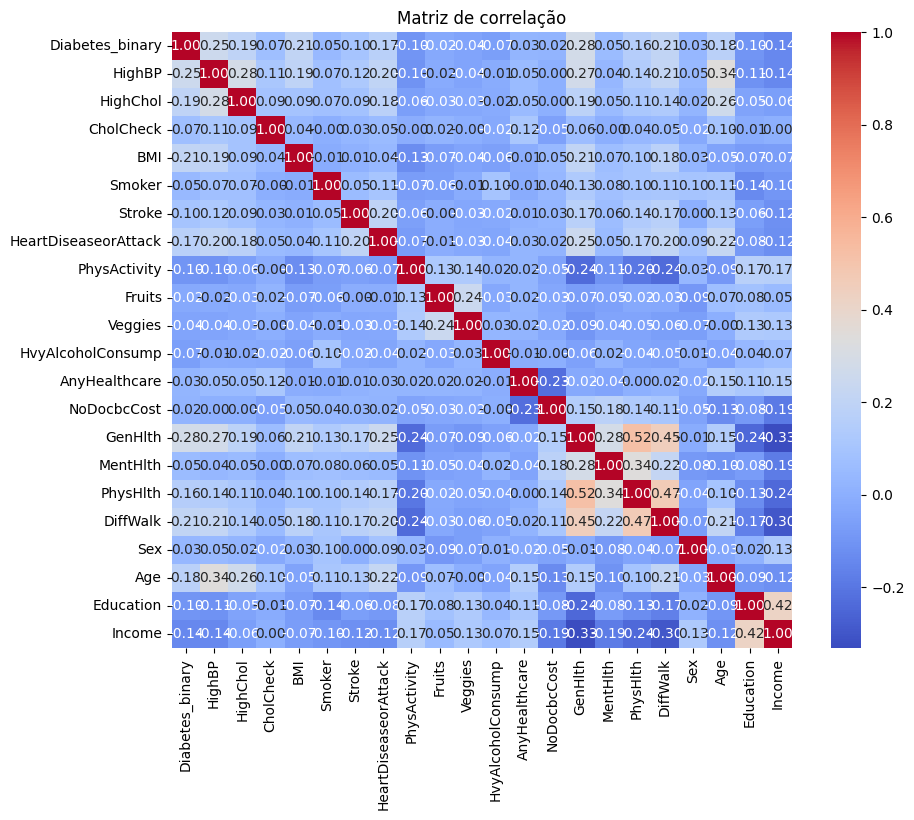

In [20]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação')
plt.show()

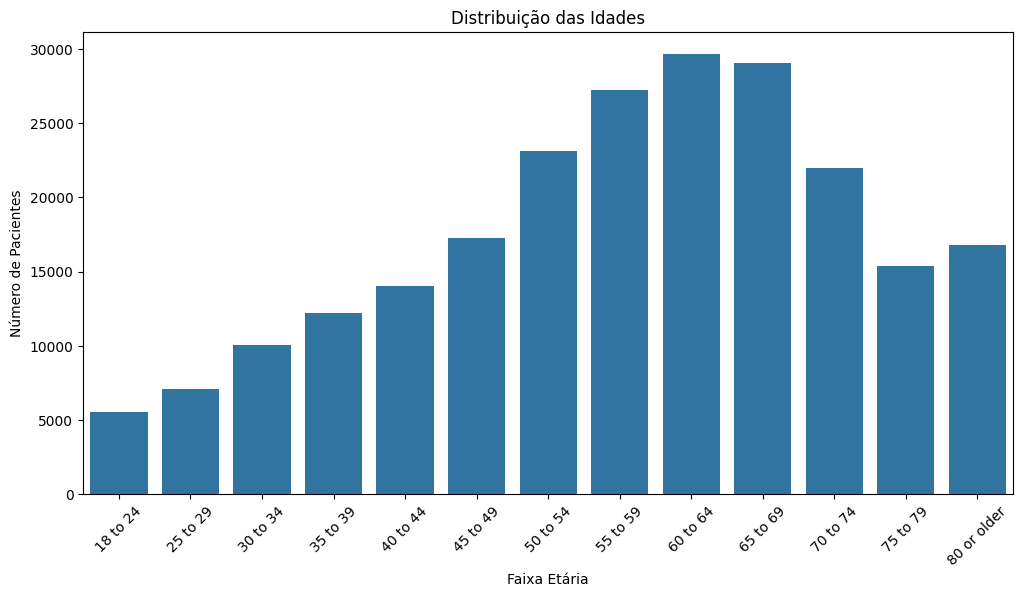

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_eda, x='Age', order=[
    '18 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', 
    '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', 
    '70 to 74', '75 to 79', '80 or older'])
plt.title('Distribuição das Idades')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.show()


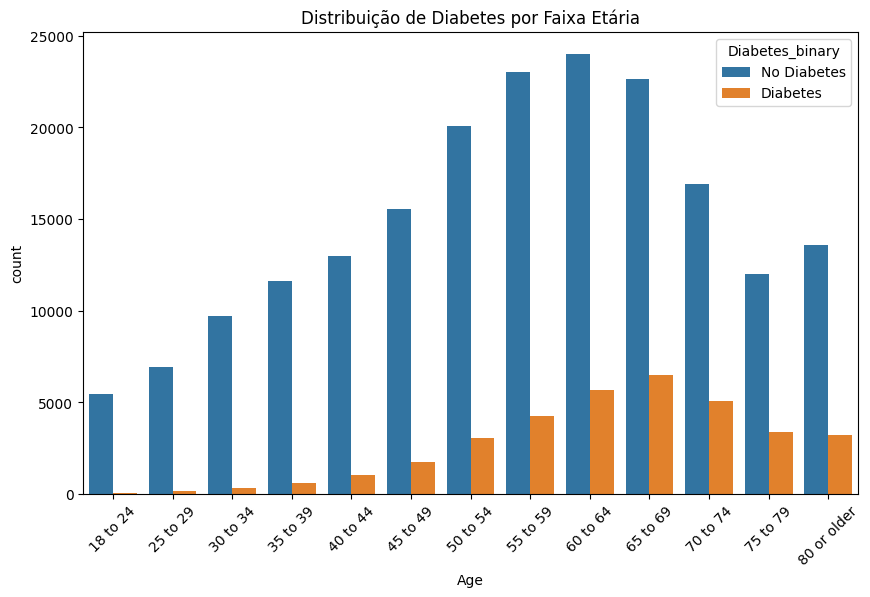

In [70]:
# Relação entre Idade e Diabetes
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='Age', hue='Diabetes_binary', order=[
    '18 to 24', '25 to 29', '30 to 34', '35 to 39', '40 to 44', 
    '45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', 
    '70 to 74', '75 to 79', '80 or older'])
plt.title('Distribuição de Diabetes por Faixa Etária')
plt.xticks(rotation=45)
plt.show()


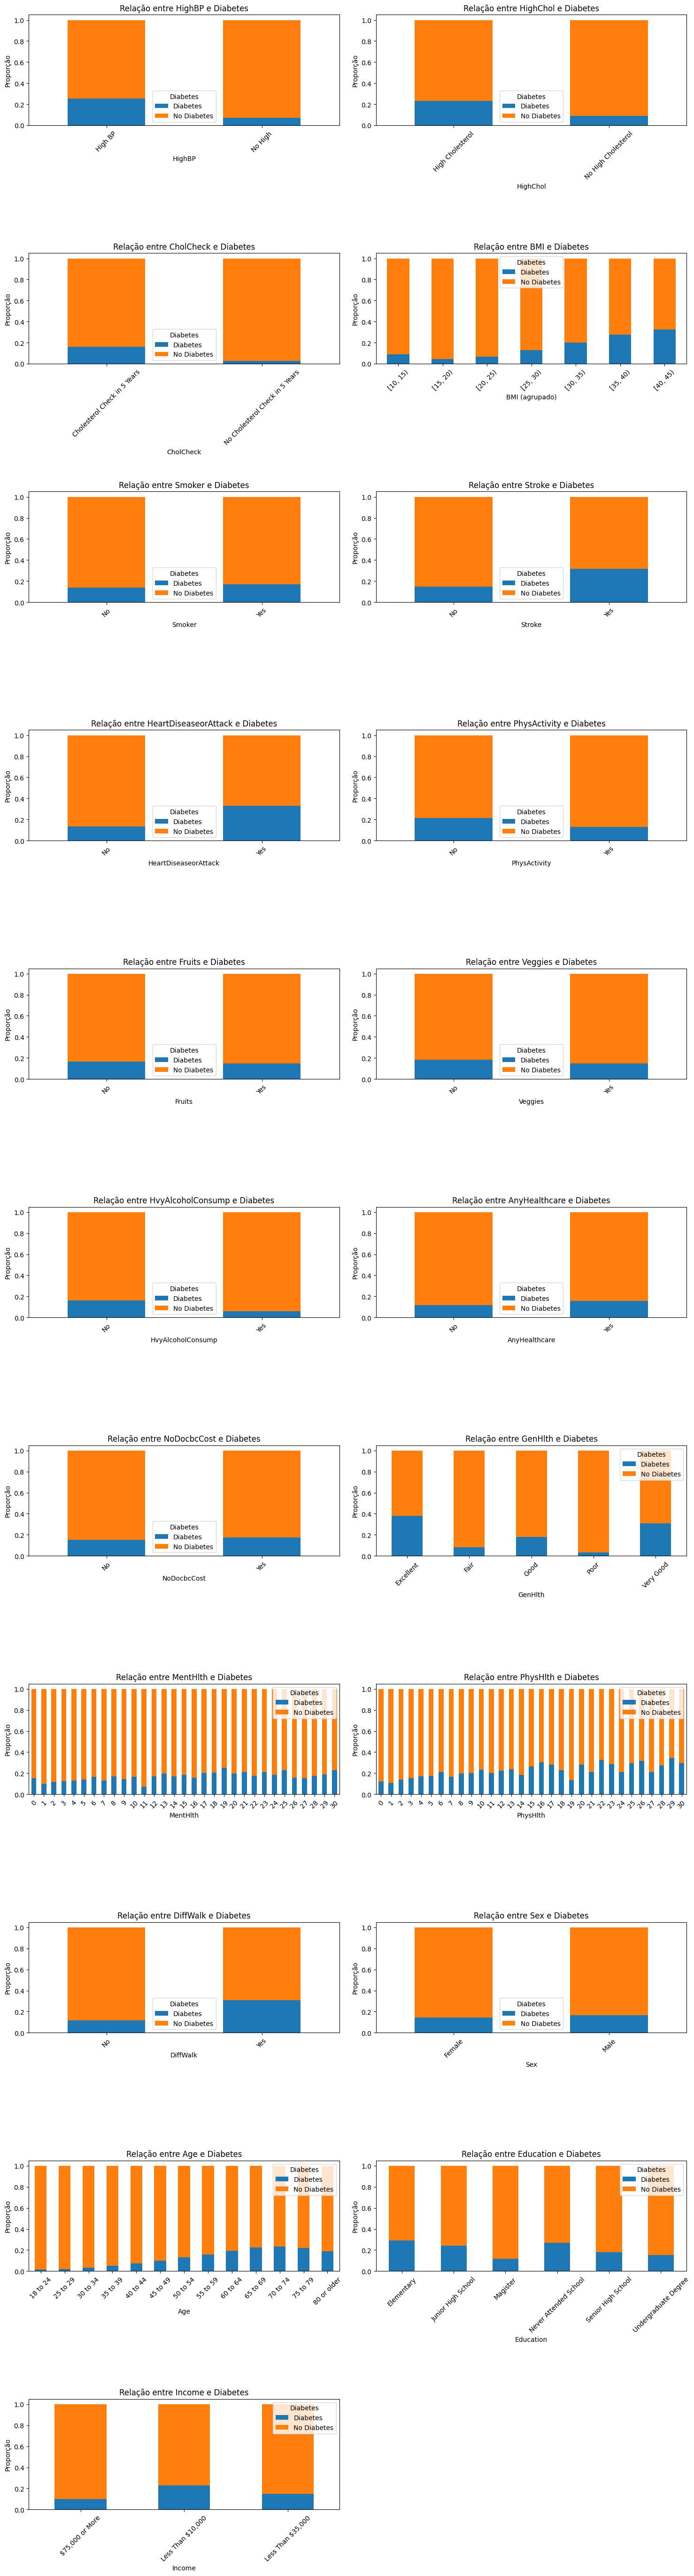

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_all_columns_with_diabetes_side_by_side(df, target_col):
    if 'BMI_bins' in df.columns:
        df.drop(columns=['BMI_bins'], inplace=True)
                
    columns = df.columns.drop(target_col)  # Exclui a coluna target
    
    # Configuração para plotar dois gráficos por linha
    num_cols = 2
    num_rows = (len(columns) + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Define o tamanho da figura
    
    # Flatten axes para trabalhar com uma lista
    axes = axes.flatten()

    for i, col in enumerate(columns):
        if col == 'BMI':
            # Agrupa os valores de BMI em intervalos de 5 unidades
            df['BMI_bins'] = pd.cut(df['BMI'], bins=range(10, 50, 5), right=False)
            cross_tab = pd.crosstab(df['BMI_bins'], df[target_col], normalize='index')
            cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
            axes[i].set_title(f'Relação entre {col} e Diabetes')
            axes[i].set_ylabel('Proporção')
            axes[i].set_xlabel('BMI (agrupado)')
            axes[i].legend(title='Diabetes')
            axes[i].tick_params(axis='x', rotation=45)
            
            # Remove a coluna BMI_bins após o gráfico ser gerado
            if 'BMI_bins' in df.columns:
                df.drop(columns=['BMI_bins'], inplace=True)
        
        
        else:
            # Para todas as outras colunas
            if df[col].nunique() > 1:  # Verifica se a coluna tem mais de uma categoria
                cross_tab = pd.crosstab(df[col], df[target_col], normalize='index')  # Tabela cruzada normalizada
                
                if not cross_tab.empty and cross_tab.shape[1] > 1:
                    cross_tab.plot(kind='bar', stacked=True, ax=axes[i])  # Cria gráfico de barras empilhadas no eixo correto
                    axes[i].set_title(f'Relação entre {col} e Diabetes')
                    axes[i].set_ylabel('Proporção')
                    axes[i].set_xlabel(col)
                    axes[i].legend(title='Diabetes')
                    axes[i].tick_params(axis='x', rotation=45)
                else:
                    axes[i].set_visible(False)

    # Remove os gráficos vazios caso o número de colunas seja ímpar
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    # Ajusta os espaçamentos entre as linhas de gráficos
    plt.tight_layout(h_pad=4)
    plt.show()

# Usando a função no seu DataFrame df_eda
plot_all_columns_with_diabetes_side_by_side(df_eda, 'Diabetes_binary')




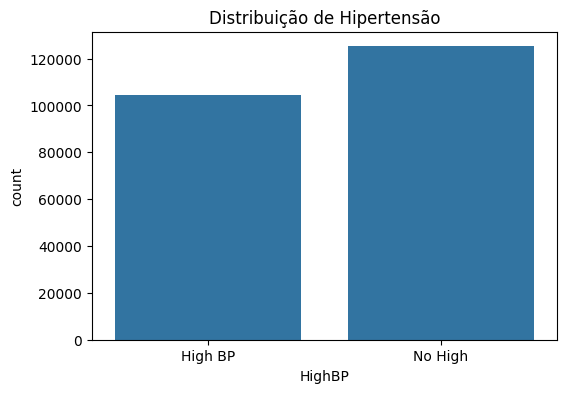

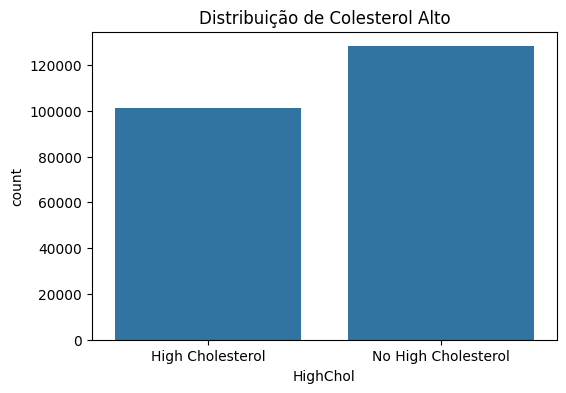

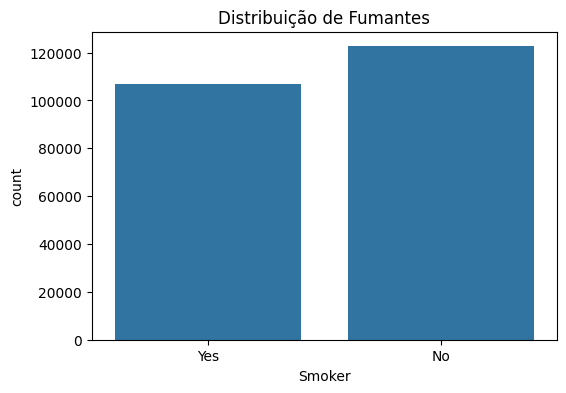

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='HighBP')
plt.title('Distribuição de Hipertensão')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='HighChol')
plt.title('Distribuição de Colesterol Alto')
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='Smoker')
plt.title('Distribuição de Fumantes')
plt.show()



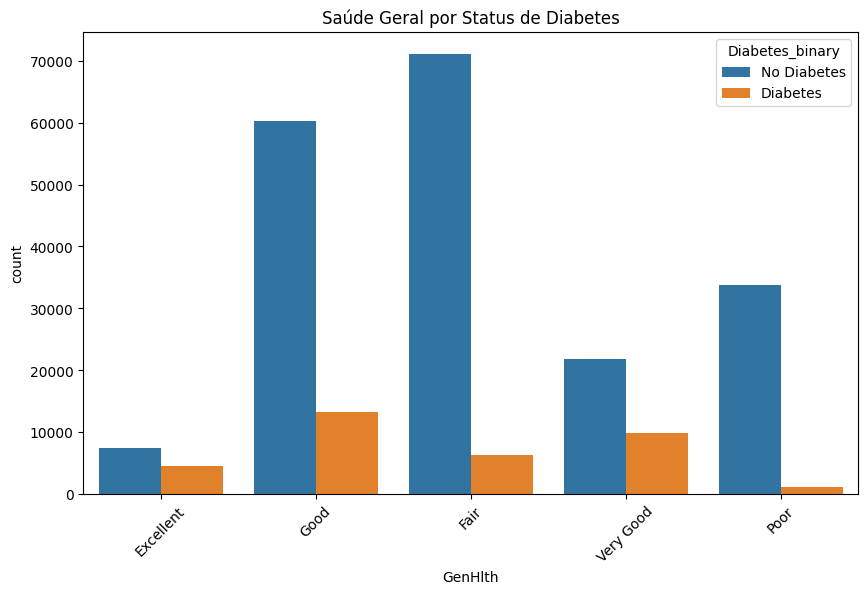

In [25]:
# Distribuição da Saúde Geral (GenHlth)

plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='GenHlth', hue='Diabetes_binary')
plt.title('Saúde Geral por Status de Diabetes')
plt.xticks(rotation=45)
plt.show()


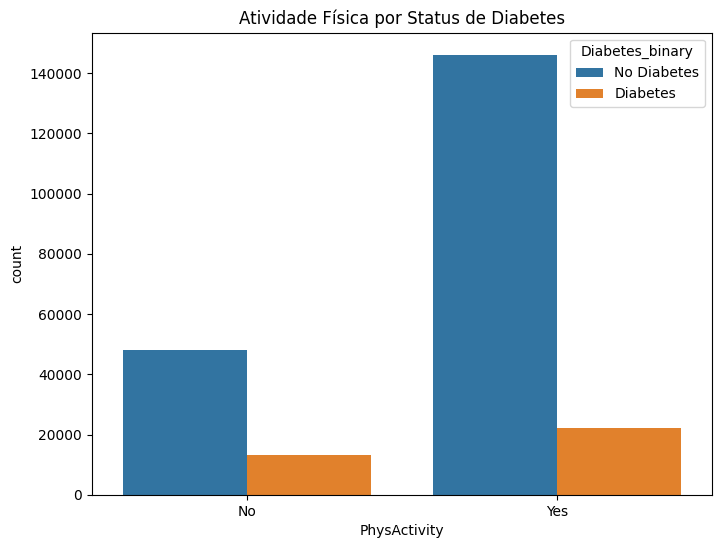

In [26]:
# Distribuição de Atividade Física (PhysActivity)
plt.figure(figsize=(8,6))
sns.countplot(data=df_eda, x='PhysActivity', hue='Diabetes_binary')
plt.title('Atividade Física por Status de Diabetes')
plt.show()


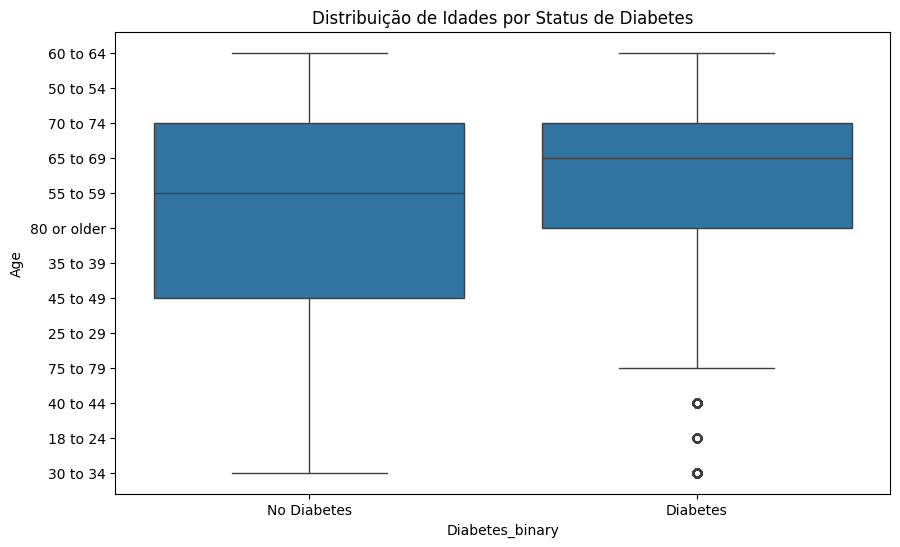

In [27]:
# Boxplot de Idade por Status de Diabetes

plt.figure(figsize=(10,6))
sns.boxplot(data=df_eda, x='Diabetes_binary', y='Age')
plt.title('Distribuição de Idades por Status de Diabetes')
plt.show()


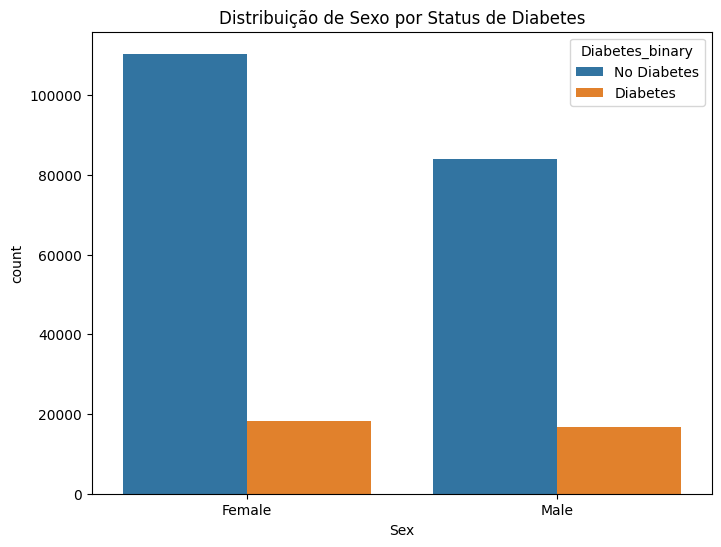

In [28]:
# Distribuição de Sexo (Sex) por Status de Diabetes
plt.figure(figsize=(8,6))
sns.countplot(data=df_eda, x='Sex', hue='Diabetes_binary')
plt.title('Distribuição de Sexo por Status de Diabetes')
plt.show()


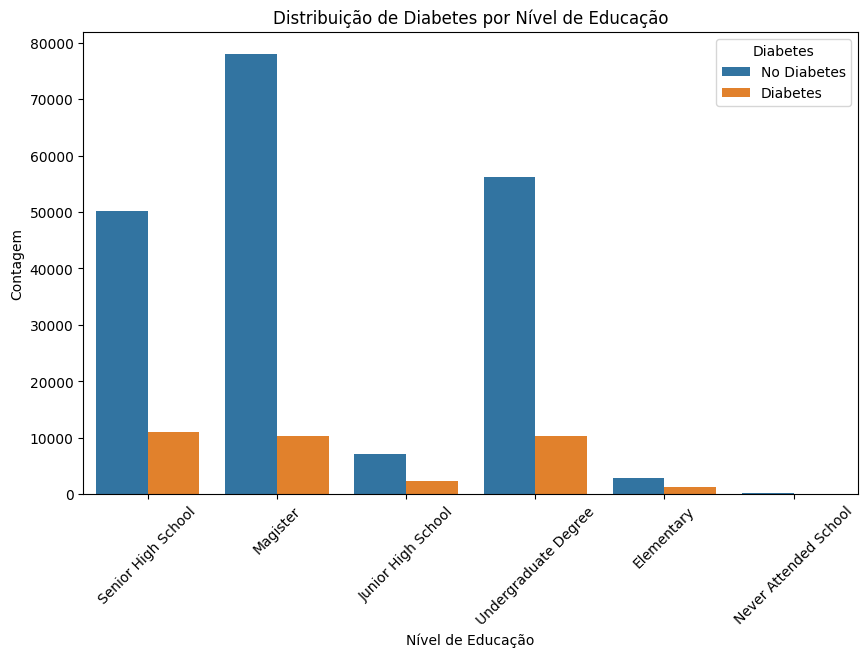

In [77]:
# Relação entre Educação e Diabetes
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='Education', hue='Diabetes_binary')
plt.title('Distribuição de Diabetes por Nível de Educação')
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.legend(title='Diabetes')
plt.show()


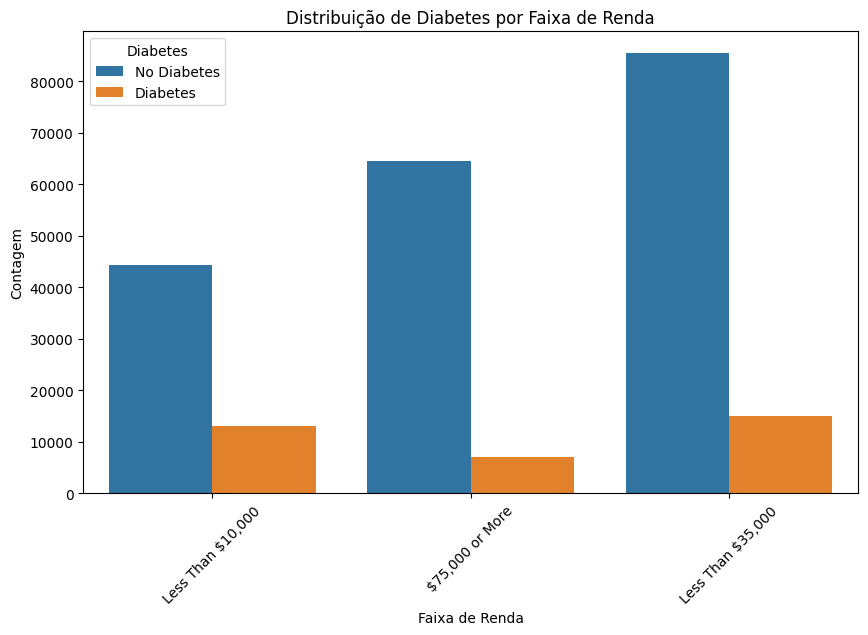

In [30]:
# Relação entre Renda (Income) e Diabetes
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='Income', hue='Diabetes_binary')
plt.title('Distribuição de Diabetes por Faixa de Renda')
plt.xticks(rotation=45)
plt.xlabel('Faixa de Renda')
plt.ylabel('Contagem')
plt.legend(title='Diabetes')
plt.show()


## Feature Engineering

### Separando a data

In [31]:
# Separar features e target para análise de features
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

### Selecionando Features

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

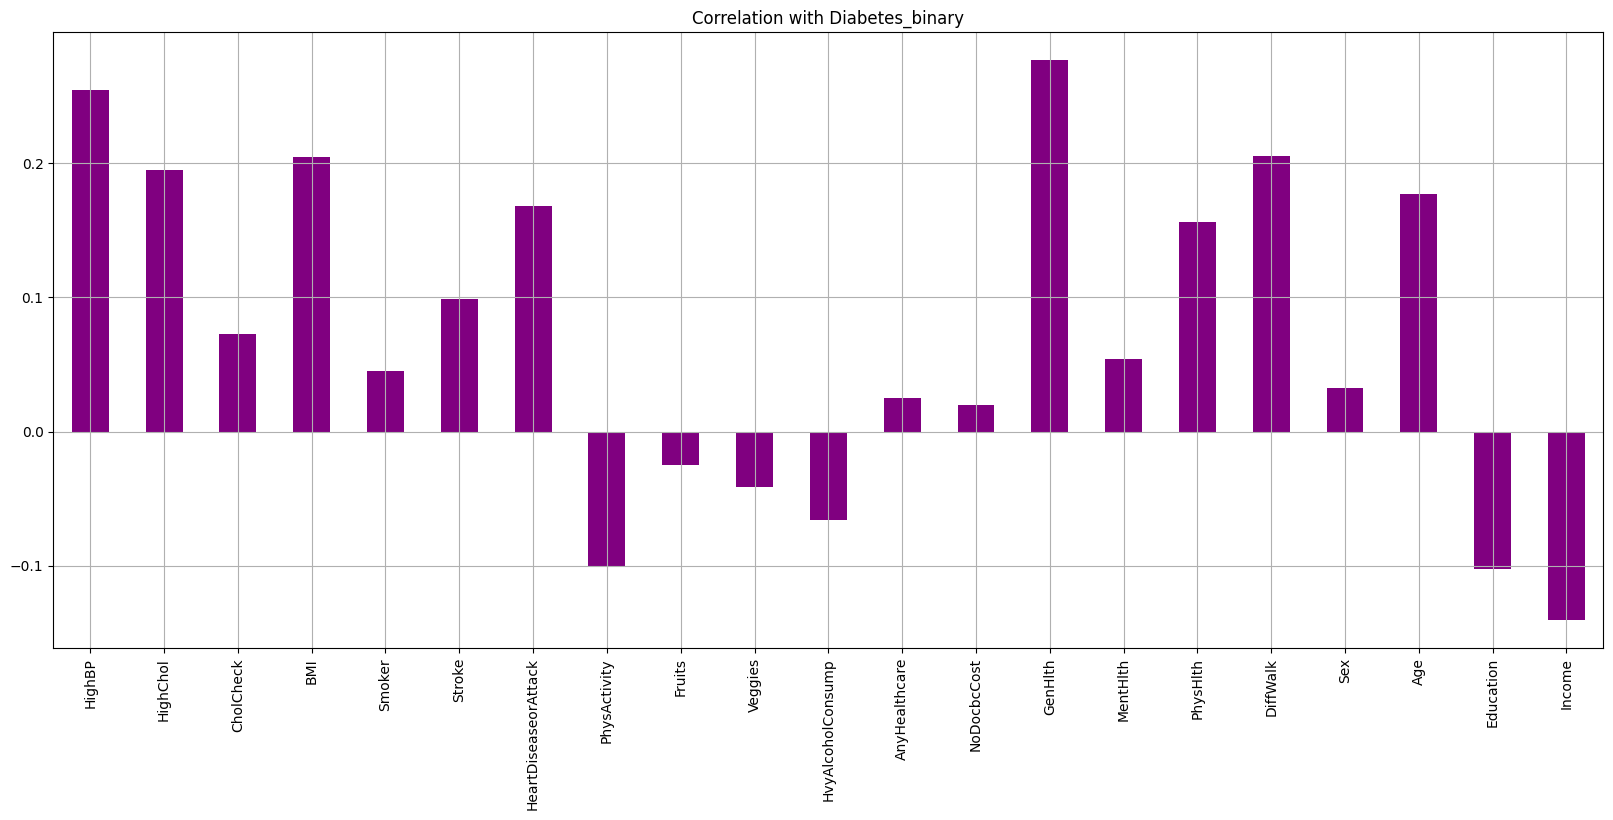

In [32]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple")

In [33]:
# Avaliando features

from sklearn.feature_selection import SelectKBest, chi2
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)


f_Scores = pd.concat([df_columns,df_scores],axis=1)            
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8098.548237
1,HighChol,4869.312739
2,CholCheck,48.904140
3,BMI,15507.736174
4,Smoker,253.826098
5,Stroke,2156.678382
6,HeartDiseaseorAttack,5822.145697
7,PhysActivity,617.563886
8,Fruits,54.688897
9,Veggies,82.098846


In [34]:
print(f_Scores.nlargest(21,'Score'))

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135
12           NoDocbcCost     83.662830
9                Veggies     82.098846
8                 Fruits     54.688897
2              CholCheck     48.904140
11         AnyHealthcare      7.949731


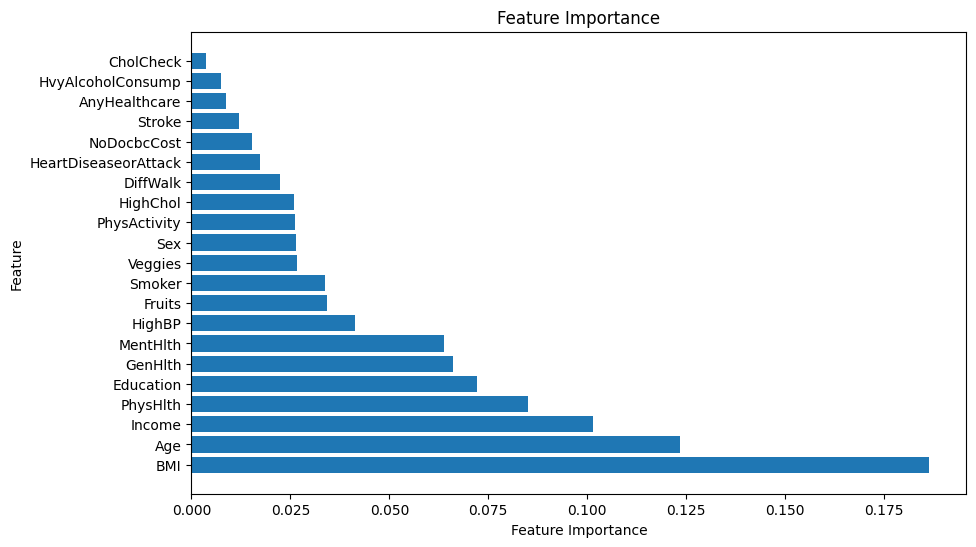

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Treina o modelo RandomForest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Calcula a importância das features
feature_importance = rf_classifier.feature_importances_

# Transforma o nome das colunas de X em uma lista
df_columns = X.columns

# Ordena as features pela importância
sorted_idx = np.argsort(feature_importance)[::-1]

# Gera o gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


### Removendo Features

In [36]:
# Removendo Colunas que podem nao agregar ao Modelo, o qual teve abaixo do Score 200 pelo SelectKBest
columns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare", "NoDocbcCost"]
df = df.drop(columns=columns, axis=1)

In [37]:
df.head()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,5,30,30,1,9,4,8
3,0,1,0,27,0,0,0,1,0,2,0,0,0,11,3,6
4,0,1,1,24,0,0,0,1,0,2,3,0,0,11,5,4


In [38]:
# Separar features e target para o Modelo
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

### Balanceando a Target

In [39]:
y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [40]:
X

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1,1,40,1,0,0,0,0,5,18,15,1,9,4,3
1,0,0,25,1,0,0,1,0,3,0,0,0,7,6,1
2,1,1,28,0,0,0,0,0,5,30,30,1,9,4,8
3,1,0,27,0,0,0,1,0,2,0,0,0,11,3,6
4,1,1,24,0,0,0,1,0,2,3,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,45,0,0,0,0,0,3,0,5,0,5,6,7
253676,1,1,18,0,0,0,0,0,4,0,0,1,11,2,4
253677,0,0,28,0,0,0,1,0,1,0,0,0,2,5,2
253678,1,0,23,0,0,0,0,0,3,0,0,0,7,5,1


In [41]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,y)

In [42]:
y_sm.shape , x_sm.shape

((70194,), (70194, 15))

In [43]:
x_sm

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,1,1,27,0,0,0,1,0,2,0,0,0,9,6,8
1,1,1,27,0,0,0,1,0,2,0,0,0,9,6,8
2,1,0,28,0,0,0,1,0,2,0,0,0,10,6,8
3,1,1,30,0,0,0,1,0,2,0,0,0,9,6,8
4,1,0,28,0,0,0,1,0,2,0,0,0,10,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70189,0,1,37,0,0,0,0,0,4,0,0,0,6,4,1
70190,0,1,29,1,0,1,0,0,2,0,0,1,10,3,6
70191,1,1,25,0,0,1,0,0,5,15,0,1,13,6,4
70192,1,1,18,0,0,0,0,0,4,0,0,1,11,2,4


In [44]:
x_sm.to_csv('x_teste.csv', index=False)

In [45]:
y_sm.value_counts()

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64

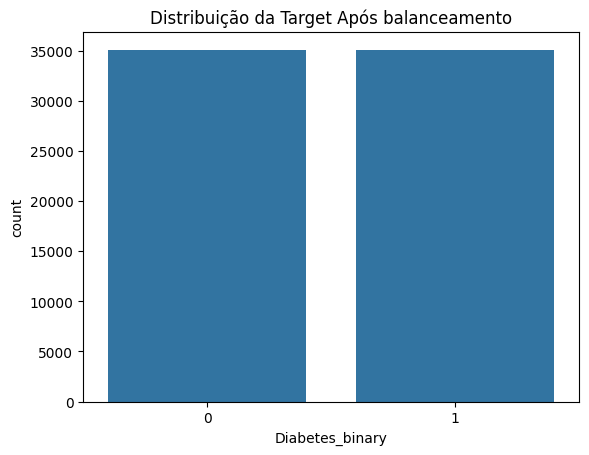

In [46]:
# Verificar a nova distribuição das classes
sns.countplot(x=y_sm)
plt.title('Distribuição da Target Após balanceamento')
plt.show()

### Separando os dados de Treino e de Teste

In [47]:
X_train , X_test , y_train , y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

### Normalização

In [48]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [49]:
import joblib

# Salvar o scaler
joblib.dump(scalar, 'scaler.pkl')

['scaler.pkl']

## Modelos de ML

### Matriz de Confusão

In [43]:
def exibir_matriz_confusao(y_test, y_pred, nome_modelo):
    """
    Calcula e exibe a matriz de confusão para um modelo dado.
    
    :param y_test: DataFrame ou array-like com o target verdadeiro.
    :param y_pred: DataFrame ou array-like com as previsões do modelo.
    :param nome_modelo: Nome do modelo ou versão dos dados para identificação na saída.
    """
    # Calcular a matriz de confusão
    matriz_confusao = confusion_matrix(y_test, y_pred)
    
    # Criar um DataFrame para uma melhor visualização
    df_matriz_confusao = pd.DataFrame(matriz_confusao,
                                      index=[f'Classe {i}' for i in range(matriz_confusao.shape[0])],
                                      columns=[f'Classe {i}' for i in range(matriz_confusao.shape[1])])
    
    # Exibir a matriz de confusão
    print(f"\nMatriz de Confusão para {nome_modelo}:")
    print(df_matriz_confusao)
    


### SVM

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Pontuações de Validação Cruzada: [0.86282691 0.86649028 0.87035718 0.86303043 0.86587972]
Média das Pontuações de Validação Cruzada: 0.8657169024117227

Matriz de Confusão para Modelo SVC:
          Classe 0  Classe 1
Classe 0      9822       646
Classe 1      2182      8409


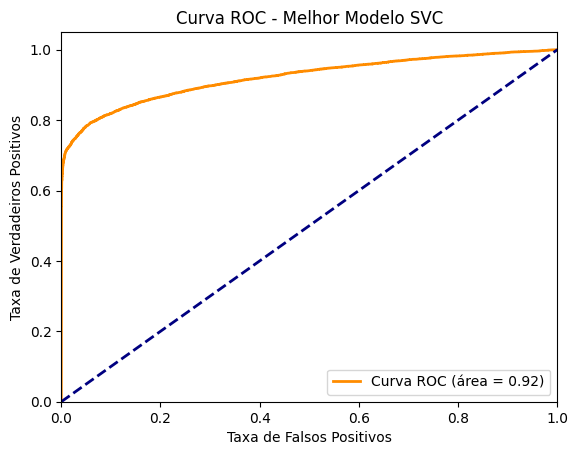

Melhor modelo: SVC(C=10, class_weight={0: 1, 1: 1.5}, probability=True, random_state=42)
Acurácia: 0.8657106225366826

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87     10468
           1       0.93      0.79      0.86     10591

    accuracy                           0.87     21059
   macro avg       0.87      0.87      0.87     21059
weighted avg       0.87      0.87      0.87     21059



In [44]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

def tune_svc_hyperparameters(x_train, y_train, x_test, y_test, parameters, cv_folds=5, random_state=42):
    """
    Ajusta os hiperparâmetros do SVC usando GridSearchCV e avalia com o conjunto de teste separado,
    incluindo o plot da curva ROC.
    
    :param x_train: DataFrame ou array-like com as features de treinamento.
    :param y_train: DataFrame ou array-like com o target de treinamento.
    :param x_test: DataFrame ou array-like com as features de teste.
    :param y_test: DataFrame ou array-like com o target de teste.
    :param parameters: Dicionário com os parâmetros para GridSearchCV.
    :param cv_folds: Número de folds para validação cruzada.
    :param random_state: Semente para reprodução dos resultados.
    :return: O melhor modelo encontrado, a acurácia e o relatório de classificação no conjunto de teste.
    """
    # Criar o modelo SVC com probabilidade ativada
    svc = SVC(probability=True, random_state=random_state)

    # Configurar o GridSearchCV
    grid_search = GridSearchCV(svc, parameters, cv=cv_folds, scoring='accuracy', n_jobs=-1, verbose=1)

    # Treinar o modelo com GridSearchCV
    grid_search.fit(x_train, y_train.values.ravel())

    # Obter o melhor modelo
    best_model = grid_search.best_estimator_

    # Avaliar o desempenho do modelo com validação cruzada
    cv_scores = cross_val_score(best_model, x_train, y_train.values.ravel(), cv=cv_folds, scoring='accuracy')
    print("Pontuações de Validação Cruzada:", cv_scores)
    print("Média das Pontuações de Validação Cruzada:", cv_scores.mean())

    # Avaliar o desempenho do modelo no conjunto de teste
    y_pred = best_model.predict(x_test)
    y_prob = best_model.predict_proba(x_test)[:, 1]  # Probabilidades para a classe positiva
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Exibir a matriz de confusão
    exibir_matriz_confusao(y_test, y_pred, "Modelo SVC")

    # Calcular e plotar a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - Melhor Modelo SVC')
    plt.legend(loc='lower right')
    plt.show()
    
    return best_model, accuracy, report

# Parâmetros para o GridSearchCV
parameters = {
    'C': [10], 
    'probability': [True],
    'class_weight': [{0: 1, 1: 1.5}]  # Penalidade maior para a classe 1
}

# Ajustar o modelo
best_model, accuracy, report = tune_svc_hyperparameters(
    X_train, y_train, X_test, y_test, parameters
)

print("Melhor modelo:", best_model)
print("Acurácia:", accuracy)
print("\nRelatório de Classificação:\n", report)


In [45]:
import joblib
# Salvar o modelo treinado

joblib.dump(best_model, 'svc_model_prev_diabet.pkl')
print("Modelo salvo como 'svc_model_prev_diabet.pkl'")

Modelo salvo como 'svc_model_prev_diabet.pkl'
